Some examples regarding the audio environment. It's using the [synthesizer](https://github.com/irmen/synthesizer) package to create sounds, given some parameters. This code is calling the package code directly, but it will be wrapped in a function or a class before starting the project.

In [25]:
from synthplayer.oscillators import Sine, SquareH, MixingFilter
from filters import LowPassFilter
import matplotlib.pyplot as plt
import sounddevice as sd
from utils import get_data

samplerate = 44100 # Sample rate of the audio
note = 440 # Note C
duration = 2 # Duration of the sound

Let's create some sounds. Watch out, audio may be too loud or too quiet.

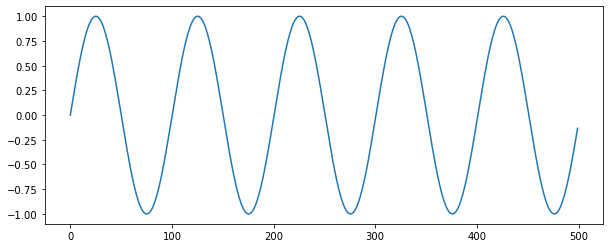

In [26]:
# A sine wave generator aka a sine oscillator
osc = Sine(note, amplitude=1, samplerate=samplerate)
sound_array = get_data(osc, duration=1, samplerate=samplerate) # Get 1 second of data from the oscillator 

plt.figure(figsize=(10,4))
plt.plot(sound_array[:500])
plt.show()

sd.play(sound_array, 44100)

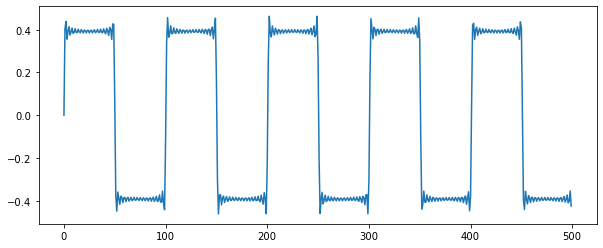

In [27]:
# A square-wave oscillator
osc = SquareH(note, amplitude=0.5, samplerate=samplerate)
sound_array = get_data(osc, duration=1, samplerate=samplerate) # Get 1 second of data from the oscillator 

plt.figure(figsize=(10,4))
plt.plot(sound_array[:500])
plt.show()

sd.play(sound_array, 44100)

Different shapes make different sounds. Let's try mixing the two together.

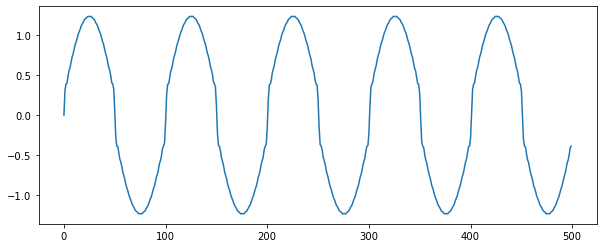

In [28]:
osc_1 = Sine(note, amplitude=1, samplerate=samplerate)
osc_2 = SquareH(note, amplitude=0.3, samplerate=samplerate)
mixer = MixingFilter(osc_1, osc_2)
sound_array = get_data(mixer, duration=1, samplerate=samplerate)

plt.figure(figsize=(10,4))
plt.plot(sound_array[:500])
plt.show()

sd.play(sound_array, 44100)

Finally we can apply "effect". Let's pass a square wave through a "Low-Pass filter". This means that it will remove all high frequencies and keep the lower ones.

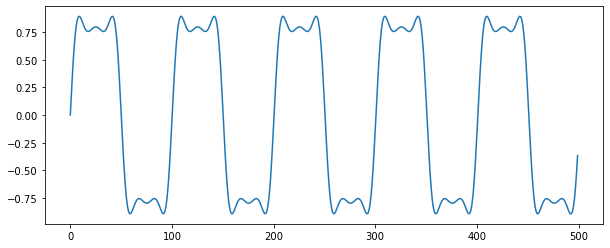

In [29]:
osc = SquareH(note, amplitude=1, samplerate=samplerate)
filtered = LowPassFilter(osc, cutoff=2500, samplerate=samplerate)
sound_array = get_data(filtered, duration=1, samplerate=samplerate)

plt.figure(figsize=(10,4))
plt.plot(sound_array[:500])
plt.show()

sd.play(sound_array, 44100)

The sharp edges of the squares and now the it sound less "harsh". Playing around with different oscillators and effects and combining everything together, can create several different sounds.